In [113]:
pip install tensorflow, numpy, pandas

  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 14.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 15.8 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.6 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl (4.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 12.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 640.8/640.8 kB 1.1 MB/s eta 0:00:0051.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24/24 [tensorflow]0m 23/24 [tensorflow]s]board]rver]


In [151]:
import pandas as pd
from pathlib import Path
from typing import Optional

training_filename = "./pagila_metrics_20250805_15-01_to_20-00.csv"
anomalies_filename = "./pagila_metrics_anomalies20250805_15-01_to_20-00.csv"

REQUIRED_COLUMNS = [
    "timestamp","connections","total_commits","total_rollbacks","blocks_hit","blocks_read",
    "read_time_ms","write_time_ms","rows_returned","rows_fetched","rows_inserted","rows_updated",
    "rows_deleted","database_size_bytes","locks_count","deadlocks","connection_limit","temp_files",
    "temp_bytes","conflicts","active_time_seconds","max_connections","shared_buffers_bytes",
    "work_mem_bytes","effective_cache_size_bytes","maintenance_work_mem_bytes",
    "checkpoint_timeout_seconds","wal_buffers_bytes","max_wal_size_bytes","min_wal_size_bytes",
    "random_page_cost","seq_page_cost","total_active_connections","max_transaction_duration",
    "wal_segments","wal_size_bytes","bgwriter_buffers_allocated","bgwriter_buffers_clean",
    "bgwriter_maxwritten_clean",
    "autovacuum_max_workers","autovacuum_naptime_seconds","autovacuum_vacuum_threshold",
    "autovacuum_analyze_threshold",
    "cache_hit_ratio_percent",
    "tps_commits","tps_rollbacks","tps_total","rollback_percent","query_efficiency",
    "rows_returned_per_interval","rows_fetched_per_interval","rows_inserted_per_interval",
    "rows_updated_per_interval","rows_deleted_per_interval","connection_usage_percent",
    "database_size_mb","wal_size_mb","total_activity_per_interval"
]

def load_dataset(path: Path, name: str) -> Optional[pd.DataFrame]:

    df = pd.read_csv(path)

    df = df[REQUIRED_COLUMNS].copy()
    
    # timestamp
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True, errors="coerce")
    if df["timestamp"].isna().any():
        raise ValueError(f"{name}: some 'timestamp' values failed to parse.")

    return df.sort_values("timestamp").reset_index(drop=True)


# Загружаем оба датафрейма в память
training_df = load_dataset(training_filename, "Training dataset")
anomalies_df = load_dataset(anomalies_filename, "Anomalies dataset")

print(f"Training dataset: {training_df.shape[0]} строк, {training_df.shape[1]} колонок")
print(f"Anomalies dataset: {anomalies_df.shape[0]} строк, {anomalies_df.shape[1]} колонок")

training_df.head()


Training dataset: 241 строк, 58 колонок
Anomalies dataset: 145 строк, 58 колонок


,timestamp,connections,total_commits,total_rollbacks,blocks_hit,blocks_read,read_time_ms,write_time_ms,rows_returned,rows_fetched,...,query_efficiency,rows_returned_per_interval,rows_fetched_per_interval,rows_inserted_per_interval,rows_updated_per_interval,rows_deleted_per_interval,connection_usage_percent,database_size_mb,wal_size_mb,total_activity_per_interval
0,2025-08-05 12:39:00+00:00,2.0,27058654.0,115.0,3.189119e+09,1738.0,0.0,0.0,1.243889e+11,690748004.0,...,0.005553,0.0,0.0,0.0,0.0,0.0,2.0,16.370257,32.0,0.0
1,2025-08-05 12:39:15+00:00,2.0,27058682.0,115.0,3.189122e+09,1738.0,0.0,0.0,1.243889e+11,690749900.0,...,0.005553,3733.0,1896.0,0.0,0.0,0.0,2.0,16.370257,32.0,5629.0
2,2025-08-05 12:39:30+00:00,2.0,27058712.0,115.0,3.189125e+09,1738.0,0.0,0.0,1.243889e+11,690751796.0,...,0.005553,3733.0,1896.0,0.0,0.0,0.0,2.0,16.370257,32.0,5629.0
3,2025-08-05 12:39:45+00:00,2.0,27058738.0,115.0,3.189128e+09,1738.0,0.0,0.0,1.243889e+11,690753692.0,...,0.005553,3733.0,1896.0,0.0,0.0,0.0,2.0,16.370257,32.0,5629.0
4,2025-08-05 12:40:00+00:00,2.0,27058768.0,115.0,3.189131e+09,1738.0,0.0,0.0,1.243889e+11,690755602.0,...,0.005553,4861.0,1910.0,0.0,0.0,0.0,2.0,16.370257,32.0,6771.0


In [152]:
def basic_stats(df: pd.DataFrame, name: str):
    print(f"\n{name} — базовая статистика")
    print("=" * 60)
    print(f"Размер: {df.shape[0]:,} строк × {df.shape[1]} колонок")
    print(f"Временной диапазон: {df['timestamp'].min()} -> {df['timestamp'].max()}")
    
    nulls = df.isna().sum().sort_values(ascending=False)
    print("\nПропуски (топ-10):")
    print(nulls.head(10))
    
    num_cols = df.select_dtypes(include=["number"]).columns
    print("\nЧисловая статистика (первые 10 колонок):")
    print(df[num_cols].describe().T.head(58))

if training_df is not None:
    basic_stats(training_df, "Training dataset")

if anomalies_df is not None:
    basic_stats(anomalies_df, "Anomalies dataset")


Training dataset — базовая статистика
Размер: 241 строк × 58 колонок
Временной диапазон: 2025-08-05 12:39:00+00:00 -> 2025-08-05 13:39:00+00:00

Пропуски (топ-10):
timestamp                     0
cache_hit_ratio_percent       0
seq_page_cost                 0
total_active_connections      0
max_transaction_duration      0
wal_segments                  0
wal_size_bytes                0
bgwriter_buffers_allocated    0
bgwriter_buffers_clean        0
bgwriter_maxwritten_clean     0
dtype: int64

Числовая статистика (первые 10 колонок):
                              count          mean           std           min  \
connections                   241.0  2.000000e+00  0.000000e+00  2.000000e+00   
total_commits                 241.0  2.706207e+07  1.986941e+03  2.705865e+07   
total_rollbacks               241.0  1.150000e+02  0.000000e+00  1.150000e+02   
blocks_hit                    241.0  3.189479e+09  2.093711e+05  3.189119e+09   
blocks_read                   241.0  1.738000e+03  0.00

In [153]:
# В датасете много константных признаков 
# Удалим их
constant_cols = [
    col for col in training_df.columns
    if col != "timestamp" and training_df[col].std() == 0
]

print(f"Константных признаков: {len(constant_cols)}")
print(constant_cols)

train_filtered = training_df.drop(columns=constant_cols)
anomalies_filtered = anomalies_df.drop(columns=constant_cols)

print(f"Train: {train_filtered.shape}, Anomalies: {anomalies_filtered.shape}")

Константных признаков: 42
['connections', 'total_rollbacks', 'blocks_read', 'read_time_ms', 'write_time_ms', 'rows_inserted', 'rows_updated', 'rows_deleted', 'database_size_bytes', 'locks_count', 'deadlocks', 'connection_limit', 'temp_files', 'temp_bytes', 'conflicts', 'max_connections', 'shared_buffers_bytes', 'work_mem_bytes', 'effective_cache_size_bytes', 'maintenance_work_mem_bytes', 'checkpoint_timeout_seconds', 'wal_buffers_bytes', 'max_wal_size_bytes', 'min_wal_size_bytes', 'random_page_cost', 'seq_page_cost', 'wal_segments', 'wal_size_bytes', 'bgwriter_buffers_allocated', 'bgwriter_buffers_clean', 'bgwriter_maxwritten_clean', 'autovacuum_max_workers', 'autovacuum_naptime_seconds', 'autovacuum_vacuum_threshold', 'autovacuum_analyze_threshold', 'tps_rollbacks', 'rows_inserted_per_interval', 'rows_updated_per_interval', 'rows_deleted_per_interval', 'connection_usage_percent', 'database_size_mb', 'wal_size_mb']
Train: (241, 16), Anomalies: (145, 16)


In [154]:
import numpy as np
import pandas as pd

# Важно перевести rate метрики в delta, чтобы модель не научилась считать их рост выше обычного как норма
# выписываем метрики за интервал или соотношения
PER_INTERVAL_OR_RATIO = [
    "tps_commits","tps_rollbacks","tps_total","rollback_percent","query_efficiency",
    "rows_returned_per_interval","rows_fetched_per_interval","rows_inserted_per_interval",
    "rows_updated_per_interval","rows_deleted_per_interval","connection_usage_percent",
    "database_size_mb","wal_size_mb","total_activity_per_interval","cache_hit_ratio_percent"
]
TIME_COL = "timestamp"


def to_features_auto(df: pd.DataFrame, name="DF", neg_frac_threshold=0.01):
    df = df.sort_values(TIME_COL).reset_index(drop=True)

    # кандидаты в кумулятивы = все числовые, не из per-interval
    num_cols = [c for c in df.columns if c != TIME_COL and pd.api.types.is_numeric_dtype(df[c])]
    candidates = sorted(list(set(num_cols) - set(PER_INTERVAL_OR_RATIO)))

    cum_cols, level_cols, neg_stats = [], [], {}
    for c in candidates:
        d = df[c].diff()
        neg_frac = float((d < 0).mean())
        if np.isnan(neg_frac):  # короткий ряд
            level_cols.append(c)
            continue
        if neg_frac <= neg_frac_threshold:
            cum_cols.append(c)
            neg_stats[c] = int((d < 0).sum())
        else:
            level_cols.append(c)

    out = pd.DataFrame({TIME_COL: df[TIME_COL]})

    # дельты для "настоящих" кумулятивов
    for c in cum_cols:
        d = df[c].diff().clip(lower=0).fillna(0.0)
        out[f"delta__{c}"] = d

    # per-interval/ratio оставляем как есть
    for c in PER_INTERVAL_OR_RATIO:
        if c in df.columns:
            out[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

    # уровневые метрики (не кумулятивы) тоже добавим как есть
    for c in level_cols:
        out[c] = pd.to_numeric(df[c], errors="coerce").fillna(0.0)

    out = out.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how="all")

    print(f"[{name}] cumulatives: {len(cum_cols)} -> {[f'delta__{c}' for c in cum_cols]}")
    if neg_stats:
        print(f"[{name}] counter resets (neg deltas) clipped to 0:", {k: v for k, v in neg_stats.items() if v > 0})
    print(f"[{name}] level features kept as-is: {len(level_cols)}")

    return out, cum_cols, level_cols

# Применяем
train_feats, train_cum_cols, train_level_cols = to_features_auto(train_filtered, name="TRAIN")
anom_feats,  anom_cum_cols,  anom_level_cols  = to_features_auto(anomalies_filtered, name="ANOMALIES")

# На всякий пожарный выравниваем колонки
common_cols = [c for c in train_feats.columns if c != TIME_COL and c in anom_feats.columns]
train_feats = train_feats[[TIME_COL] + common_cols]
anom_feats  = anom_feats[[TIME_COL] + common_cols]

print("Готово:",
      f"\n  train_feats: {train_feats.shape}",
      f"\n  anom_feats:  {anom_feats.shape}")


[TRAIN] cumulatives: 5 -> ['delta__active_time_seconds', 'delta__blocks_hit', 'delta__rows_fetched', 'delta__rows_returned', 'delta__total_commits']
[TRAIN] counter resets (neg deltas) clipped to 0: {}
[TRAIN] level features kept as-is: 2
[ANOMALIES] cumulatives: 5 -> ['delta__active_time_seconds', 'delta__blocks_hit', 'delta__rows_fetched', 'delta__rows_returned', 'delta__total_commits']
[ANOMALIES] counter resets (neg deltas) clipped to 0: {}
[ANOMALIES] level features kept as-is: 2
Готово: 
  train_feats: (241, 16) 
  anom_feats:  (145, 16)


In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

TIME_COL = "timestamp"

#удаляем нулевую дисперсию по train (только по числовым фичам)
num_cols = [c for c in train_feats.columns if c != TIME_COL and pd.api.types.is_numeric_dtype(train_feats[c])]
stds = train_feats[num_cols].std(ddof=0)
zero_var_cols = stds[stds == 0].index.tolist()

print(f"Нулевой дисперсии колонок на train: {len(zero_var_cols)}")
if zero_var_cols:
    print(zero_var_cols)

train_feats_nz = train_feats.drop(columns=zero_var_cols)
anom_feats_nz  = anom_feats.drop(columns=zero_var_cols)

# 2) выравниваем порядок колонок и формируем матрицы признаков
feature_cols = [c for c in train_feats_nz.columns if c != TIME_COL]
train_feats_nz = train_feats_nz[[TIME_COL] + feature_cols]
anom_feats_nz  = anom_feats_nz[[TIME_COL] + feature_cols]

X_train = train_feats_nz[feature_cols].values
X_test  = anom_feats_nz[feature_cols].values

# 3) масштабируем по train
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

print("Готово:",
      f"\n  feature_cols: {len(feature_cols)}",
      f"\n  X_train_s: {X_train_s.shape}",
      f"\n  X_test_s:  {X_test_s.shape}")


Нулевой дисперсии колонок на train: 0
Готово: 
  feature_cols: 15 
  X_train_s: (241, 15) 
  X_test_s:  (145, 15)


,timestamp,recon_error,is_anomaly
120,2025-08-05 14:09:00+00:00,1.382854,True
0,2025-08-05 13:39:00+00:00,1.049115,True
119,2025-08-05 14:08:45+00:00,0.912919,True
142,2025-08-05 14:14:30+00:00,0.912782,True
128,2025-08-05 14:11:00+00:00,0.889653,True
133,2025-08-05 14:12:15+00:00,0.884439,True
138,2025-08-05 14:13:30+00:00,0.869989,True
127,2025-08-05 14:10:45+00:00,0.848593,True
129,2025-08-05 14:11:15+00:00,0.795769,True
131,2025-08-05 14:11:45+00:00,0.778115,True


Input dim: 15
Threshold (99th pct train): 0.255202
Anomaly share: 31.72%


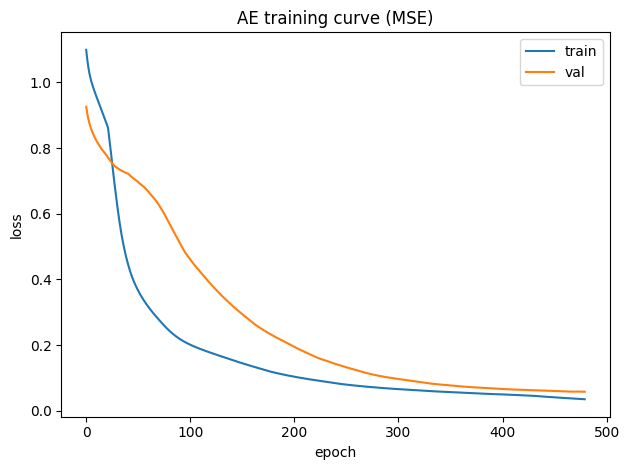

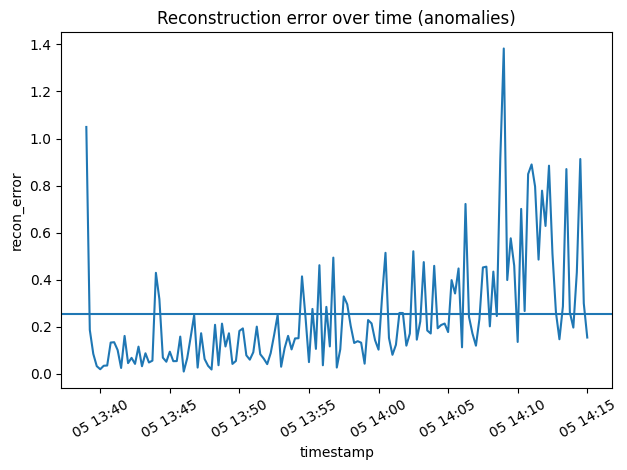

In [ ]:
# --- AutoEncoder (Keras / TensorFlow) ---
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt


# Фиксируем seed для повторяемости
tf.random.set_seed(42)
np.random.seed(42)

input_dim = X_train_s.shape[1]
enc_units = max(8, input_dim // 2)      # первый скрытый слой энкодера
bottleneck = max(4, input_dim // 4)     # "горлышко"
dec_units = enc_units                   # симметричный декодер

# Модель: Input -> Dense(enc) -> Dense(bottleneck) -> Dense(dec) -> Dense(output)
inputs = keras.Input(shape=(input_dim,), name="input")
x = layers.Dense(enc_units, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-5))(inputs)
x = layers.Dense(bottleneck, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-5))(x)
x = layers.Dense(dec_units, activation="relu",
                 kernel_regularizer=regularizers.l2(1e-5))(x)
outputs = layers.Dense(input_dim, activation="linear", name="recon")(x)

ae = keras.Model(inputs, outputs, name="ae_mlp")
ae.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="mse")

# Callbacks: ранняя остановка + уменьшение LR при плато
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=6, min_lr=1e-5)
]

history = ae.fit(
    X_train_s, X_train_s,
    epochs=500,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=0
)

# Reconstruction error
train_recon = ae.predict(X_train_s, verbose=0)
test_recon  = ae.predict(X_test_s,  verbose=0)
train_err = np.mean((train_recon - X_train_s)**2, axis=1)
test_err  = np.mean((test_recon  - X_test_s )**2, axis=1)

# Порог — 99-й перцентиль
threshold = float(np.percentile(train_err, 99.0))

# Результаты по anomalies_df
result = anom_feats_nz[["timestamp"]].copy()
result["recon_error"] = test_err
result["is_anomaly"] = result["recon_error"] > threshold

display(result.sort_values("recon_error", ascending=False).head(20))
print(f"Input dim: {input_dim}")
print(f"Threshold (99th pct train): {threshold:.6g}")
print(f"Anomaly share: {result['is_anomaly'].mean():.2%}")

# Графики: кривая обучения и ошибка по времени
plt.figure()
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("AE training curve (MSE)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(result["timestamp"], result["recon_error"])
plt.axhline(threshold)
plt.title("Reconstruction error over time (anomalies)")
plt.xlabel("timestamp")
plt.ylabel("recon_error")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


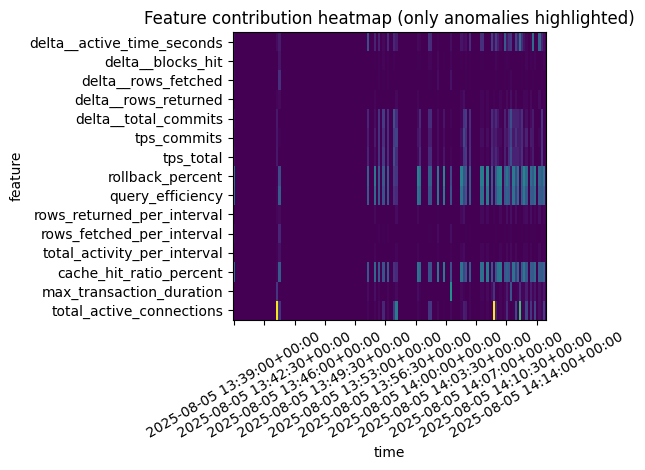

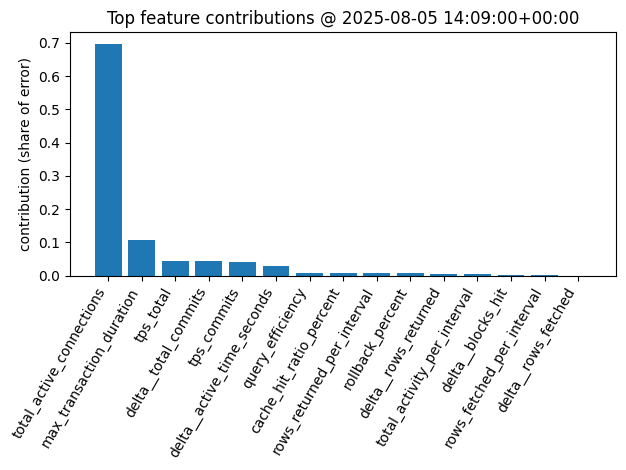

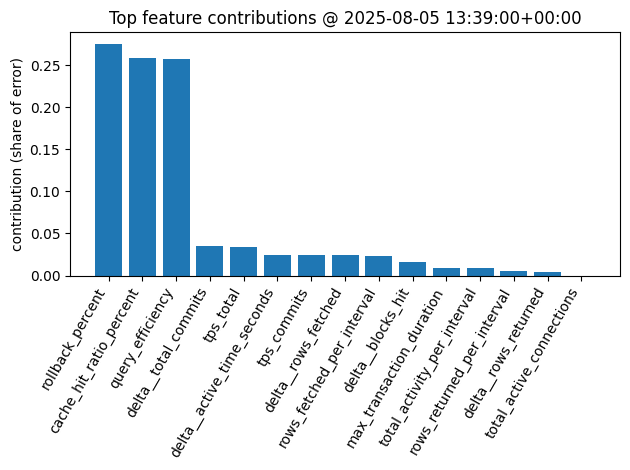

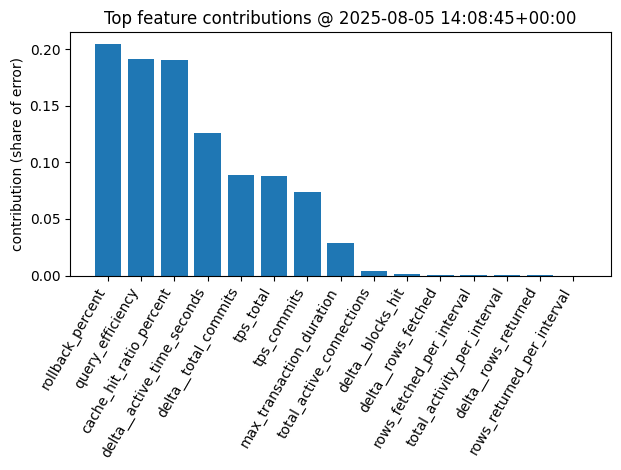

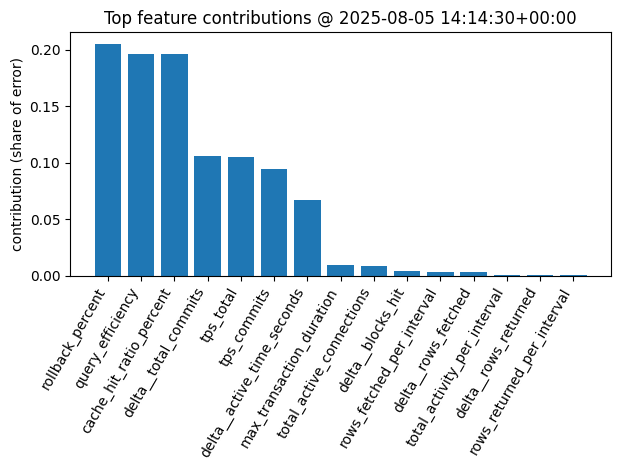

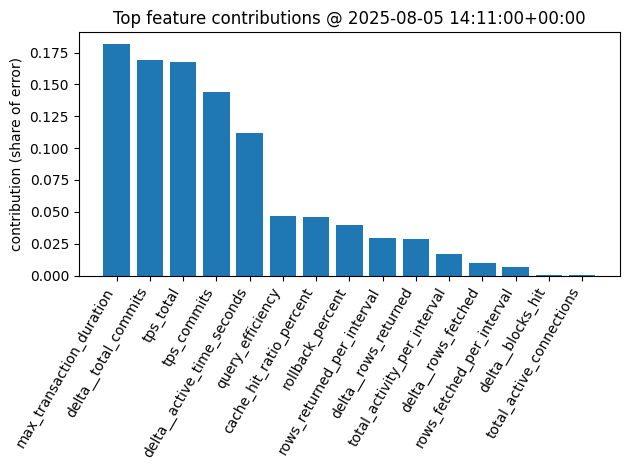

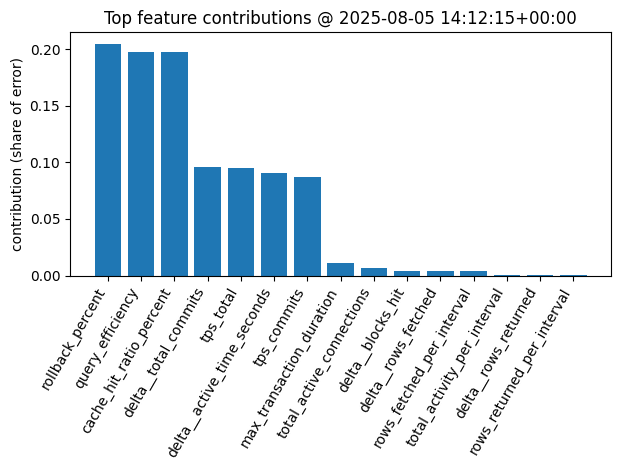

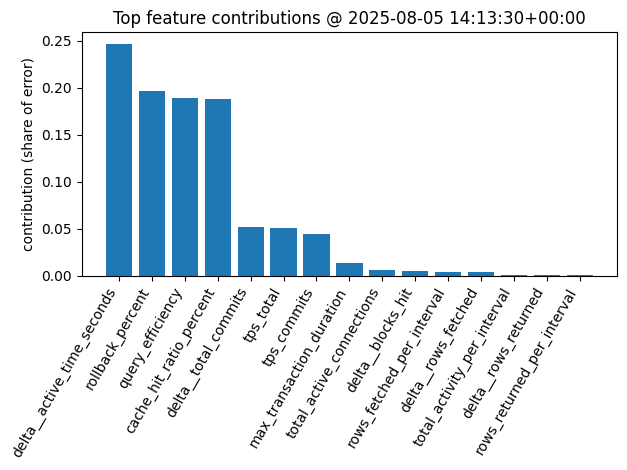

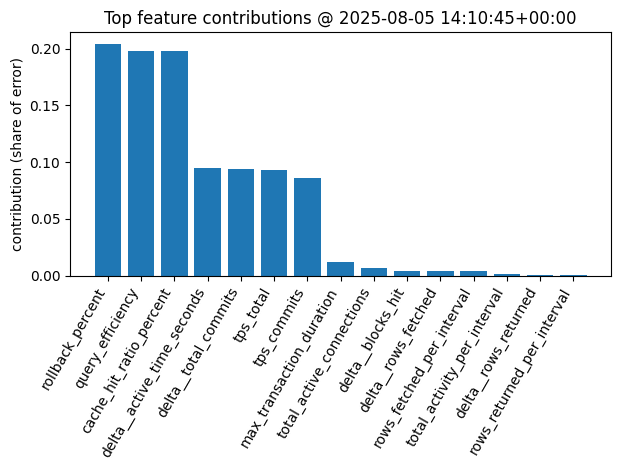

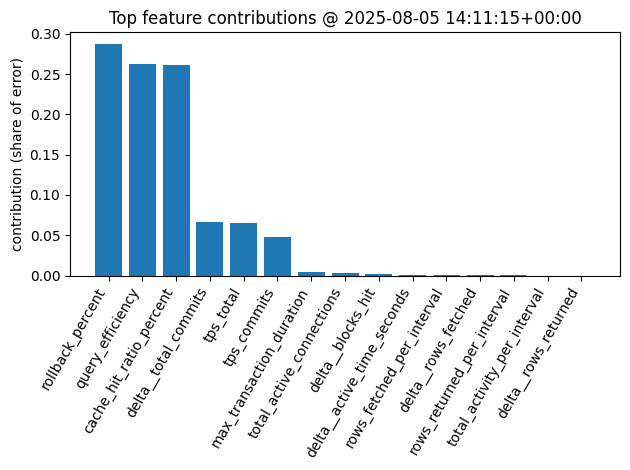

In [165]:
# === Feature-level attribution for AE anomalies ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Покомпонентная ошибка на аномальном интервале
test_recon = ae.predict(X_test_s, verbose=0)
per_feat_err = (test_recon - X_test_s) ** 2  # [n_samples, n_features]

# Нормируем в "вклады" (сумма по признакам = 1 для каждой строки)
row_sum = per_feat_err.sum(axis=1, keepdims=True)
row_sum[row_sum == 0] = 1.0
contrib = per_feat_err / row_sum  # [n_samples, n_features]

# Привязываем к timestamp
ts = anom_feats_nz["timestamp"].reset_index(drop=True)
contrib_df = pd.DataFrame(contrib, columns=feature_cols)
contrib_df.insert(0, "timestamp", ts)

# Heatmap вкладов (показываем только в аномальных точках)
mask = result["is_anomaly"].to_numpy()
heat = contrib.copy()
heat[~mask, :] = 0.0  # неаномальные — нули, чтобы не отвлекали

plt.figure()
plt.imshow(heat.T, aspect="auto", interpolation="nearest")
plt.yticks(range(len(feature_cols)), feature_cols)
xticks = np.arange(len(ts))[::max(1, len(ts)//10)]
plt.xticks(xticks, [str(t) for t in ts.iloc[xticks]], rotation=30)
plt.title("Feature contribution heatmap (only anomalies highlighted)")
plt.xlabel("time")
plt.ylabel("feature")
plt.tight_layout()
plt.show()

# 4) Bar-chart вкладов для топ-5 аномалий
TOP_K = 9
top_idx = np.argsort(result["recon_error"].to_numpy())[-TOP_K:][::-1]
for i in top_idx:
    row = contrib[i, :]
    order = np.argsort(row)[::-1]
    top_features = np.array(feature_cols)[order][:15]  # топ-15, чтобы не захламлять
    top_values = row[order][:15]
    plt.figure()
    plt.bar(top_features, top_values)
    plt.title(f"Top feature contributions @ {ts.iloc[i]}")
    plt.xticks(rotation=60, ha="right")
    plt.ylabel("contribution (share of error)")
    plt.tight_layout()
    plt.show()
